<img src="https://i.imgur.com/TM1tRpS.png" alt="Logo UFRJ" style="margin:0 auto 0">

<p style="text-align: center;font-size:1.1em; font-family: sans-serif;">UNIVERSIDADE FEDERAL DO RIO DE JANEIRO</p>
<p style="text-align: center;font-size:1.1em; font-family: sans-serif;">INSTITUTO DE COMPUTAÇÃO</p>
<p style="text-align: center;font-size:1.1em; font-weight: normal; font-family: sans-serif;">DEPARTAMENTO DE CIÊNCIA DA COMPUTAÇÃO</p>


<br>
<br>
<br>
<br>
<br>


<p style="text-align: center;font-size:1.1em; font-family: sans-serif;">Carlos Bravo<br>Gabrielly de Andrade<br>Markson Arguello</p>

<br>
<br>
<br>
<br>
<br>





<p style="text-align: center;font-weight: bold; font-size:1.5em; font-family: sans-serif;">Biblioteca de Cálculo Numérico</p>


<br>
<br>
<br>
<br>
<br>

<p style="text-align: center;font-weight: bold; font-size:1.0em; font-family: sans-serif;">Rio de Janeiro<br>2022</p>

# Introdução
Essa é uma biblioteca feita para o trabalho final da disciplina de **Cálculo Numérico** no período de 21.2. A biblioteca inclui funções aprendidas e utilizadas durante todo o semestre, como soluções de sistemas lineares, integração, decomposição LU entre outros. Neste notebook falaremos sobre todas essas funções, além disso, será apresentado a documentação e exemplos das funções. 

In [14]:
include("NumericalCalculus.jl");

In [15]:
using Plots
theme(:lime)

## 1. Aproximação de valor

Esse tópico refere-se ao problema 

> 2. Problema: Achar um valor aproximado de uma função com informações de derivadas

### 1.1 Introdução

Dado uma função, queremos descobrir o seu valor aproximado em um determinado ponto. Isso pode ser um problema muito complicado para se calcular na mão e podemos utilizar o série de Taylor tal que a cada vez eu adiciono um novo termo na sequência eu me aproximo cada vez mais do valor real.

Vamos testar com alguns exemplos da biblioteca.

### 1.2 Primeiro exemplo

Vamos aproximar $sen(0.01)$

Repare que temos valores conhecidos para $sen$ pela tabela trigonométrica

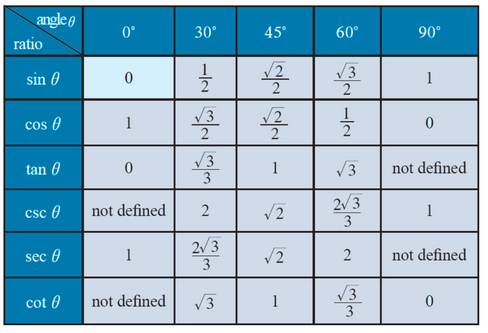

Se quiséssemos calcular na mão, seria muito trabalhoso aproximar **0.01**. Felizmente, podemos utilizar nossa biblioteca para calcular essa aproximação.

O nome da função é **value_approximation**, vamos explorá-la

In [9]:
?value_approximation

search: value_approximation



## Objetivo

Achar um valor aproximado de uma função com informações de derivadas utilizando o método de Taylor

## Especificação

$|y - f(x)|<= E$

## Parâmetros de entrada

```
x : Number
    Valor aproximado que queremos calcular a aproximação em y (f(x))

a : Number
    Ponto fixo que será calculado a aproximação
    Idealmente é próximo de x e é conhecida as derivadas no ponto

derivatives : Vector
    Vetor com informações das derivadas no ponto a: f(a), f'(a), f''(a) ...

M: Number
    Maior valor da n-derivada no intervalo (teto)

n: Int64, default 2
    Número de termos do polinômio de Taylor
    Se nenhum valor for passado será calculado o polinômio de ordem 2
```

## Retorno

```
y : Float64
    Retorna o valor aproximado de f(x)

E : Float64
    Retorna o erro da aproximação
```

## Exceções

```
AssertionError
    Caso a quantidade de derivadas no vetor seja insuficiente para realizar o 
    cálculo, levanta exceção de domínio
```


Vendo o contrato da função, precisamos 4 parâmetros obrigatórios. Repare que a função sen(x) oscila entre 1 e -1, portanto sua derivada tem um teto de no máximo 1

In [10]:
# Exemplo 1.1 com ordem = 3

f1_1(x) = sin(x)
df1_1(x) = cos(x)
d2f1_1(x) = -sin(x)
d3f1_1(x) = -cos(x)

# Parâmetros obrigatórios
x_1_1 = 0.01
a_1_1=0
derivates_1_1 = [f1_1(a_1_1), df1_1(a_1_1), d2f1_1(a_1_1), d3f1_1(a_1_1)]
M_1_1 = 1

# Parâmetro opcional

ordem_1_1 = 3


value_approximation(x_1_1, a_1_1, derivates_1_1, M_1_1, ordem_1_1)

(0.009999833333333333, 4.166666666666667e-10)

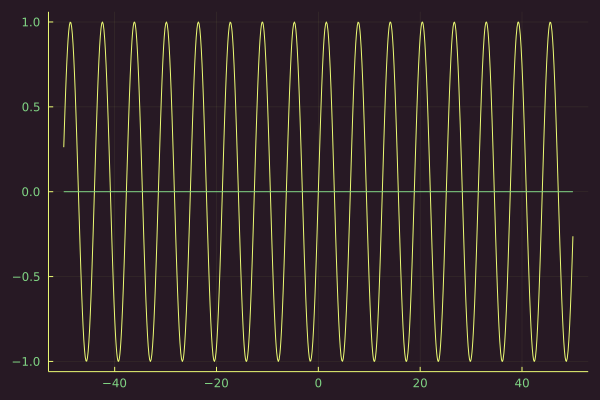

In [11]:
f1_1(x) = sin(x)
plot(f1_1, -50, 50, legend=false) 
plot!(zero)

### 1.2 Segundo exemplo

Vamos aproximar $cos(0.90)$.

Repare que é um pouco parecido com o exemplo anterior, mas dessa vez vamos utilizar a ordem = 2 como padrão

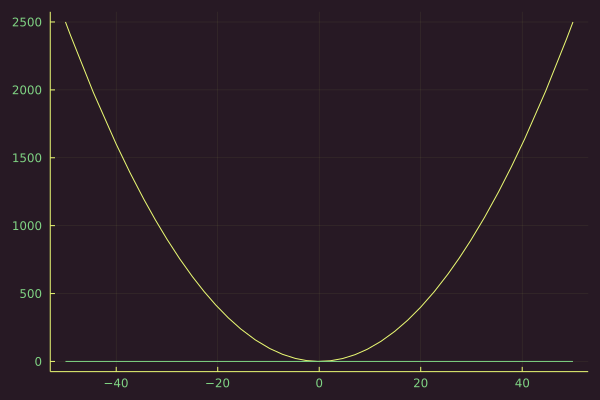

In [12]:
f_1_2(x) = cos(x)
plot(f, -50, 50, legend=false) 
plot!(zero)

In [13]:
# Exemplo 1.2 com ordem padrão = 2

f1_2(x) = cos(x)
df1_2(x) = -sin(x)
d2f1_2(x) = -cos(x)

# Parâmetros obrigatórios
x_1_2 = 0.90
a_1_2=0
derivates_1_2 = [f1_2(a_1_2), df1_2(a_1_2), d2f1_2(a_1_2)]
M_1_2 = 1


value_approximation(x_1_2, a_1_2, derivates_1_2, M_1_2)

(0.595, 0.12150000000000001)

### 1.3 Terceiro exemplo

Vamos aproximar $ln(1.5)$.

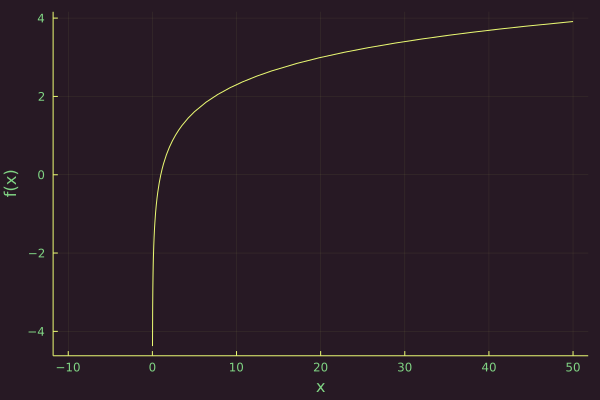

In [16]:
ln(x) = log(ℯ, x)

plot(ln, -10, 50, legend=false)
xlabel!("x")
ylabel!("f(x)")

In [17]:
# Exemplo 1.3 com ordem = 3

f1_3(x) = ln(x)
df1_3(x) = 1/x
d2f1_3(x) = -1/(x^2)
d3f1_3(x) = 2/(x^3)

# Parâmetros obrigatórios
x_1_3 = 1.5
a_1_3=1
derivates_1_3 = [f1_3(a_1_3), df1_3(a_1_3), d2f1_3(a_1_3), d3f1_3(a_1_3)]
M_1_3 = 1


value_approximation(x_1_3, a_1_3, derivates_1_3, M_1_3, 3)

(0.4166666666666667, 0.0026041666666666665)

## 2. Aproximação de raiz de função

Esse tópico refere-se ao problema 

> 3. Problema: Encontrar raíz aproximadamente

### 2.1 Introdução

Dado uma função, queremos descobrir o seu valor aproximado em um determinado ponto. Isso pode ser um problema muito complicado para se calcular na mãoe podemos utilizar o série de Taylor tal que a cada vez eu adiciono um novo termo na sequência eu me aproximo cada vez mais do valor real.

Vamos testar com alguns exemplos da biblioteca.

### 2.2 Primeiro exemplo

Vamos aproximar $\sqrt[3]{43}$ 

Se quiséssemos calcular na mão, seria muito trabalhoso aproximar esse valor. Felizmente, podemos utilizar nossa biblioteca para calcular essa aproximação.

O nome da função é **find_root**, vamos explorá-la

In [18]:
?find_root

search: find_root



## Objetivo

Encontrar zero de função (raiz) para calcular aproximação de valores numéricos com o método da Bisseção. Retorna um aviso caso o intervalo passado pelo usuário não possua sinais trocados.

## Especificação

$f(r)=0$ e $|x-r| <= erro$

## Parâmetros

```
f : Function
    Recebe uma função 

a : Number
    Início do intervalo

b : Number
    Fim do intervalo

error: Number
    Erro no domínio
```

## Retorno

```
root : Float64
    Retorna uma aproximação para a raiz calculada pelo método da Bisseção
```

## Exceções

```
AssertionError
    Caso o intervalo passado não tenha troca de valores no intervalo (sinais opostos) para o método da Bisseção
```

---

## Objetivo

Encontrar zero de função (raiz) para calcular aproximação de valores numéricos com o método de Newton

## Especificação

$f(r)=0$

## Parâmetros

```
f : Function
    Recebe uma função 

derivative: Function
    Derivada da função f

kick: Float64
    Chute da função inicial para começar a aplicar o método

qtty_iterations: Int64, default 10
    Quantidade de interações para ser utilizada no método 
    Caso nenhum valor seja passado será calculado 10 iterações
```

## Retorno

```
root : Float64
    Retorna uma aproximação para a raiz calculada pelo método de Newton
```


Para aproximar $\sqrt[3]{43}$ temos que pensar em um número tal que $x^3 = 43$, ou seja, podemos pensar em uma função $f(x) = x^3 - 43$.

Vamos utilizar no primeiro exemplo o método de Newton para calcular essa aproximação

In [19]:
# Exemplo 2.1 

# Passo 1: definir a função que queremos aproximar
f_2_1(x) = x^3 - 43

# Passo 2: escolher um chute (valor arbitrário, de preferência que se aproxime do zero da função)

chute_2_1 = 4

# Passo 3: derivar f

derivada_f_2_1(x) = 3x^2

find_root(f_2_1, derivada_f_2_1, chute_2_1)

3.5033980603867243

### 2.3 Segundo exemplo

Agora, vamos aproximar o mesmo valor $\sqrt[3]{43}$, mas dessa vez utilizando o método da bisseção.

Podemos perceber pela documentação da função que podemos passar novos parâmetros para utilizar esse método.
Dessa vez temos que passar além da função um intervalo e um erro.
 

In [20]:
# Exemplo 2.2

find_root(f_2_1, big"-100", big"100", 10^-2)

3.5003662109375

Repare que caso não tivesse sinais trocados no intervalo teríamos recebido um aviso como no exemplo abaixo

In [21]:
# Exemplo 2.2

find_root(f_2_1, big"10", big"100", 10^-2)

LoadError: AssertionError: Aviso!! A função no intervalo passado [10, 100] não possui sinais opostos

### 2.4 Terceiro exemplo

Vamos aproximar $ln(3)$, utilizando o método da bisseção com um erro de $10^{-3}$ no intervalo de 0 a 10

 

Como sabemos calcular $e^x$ podemos utilizar a seguinte relação:

$e^{ln(3)} = e^{x}$ e teremos a relação $x = ln(3)$ que é o que queremos encontrar.


Repare que pela propriedade $ln(e^c) = c$, teremos $ln(e^x) = x$, onde $e^x = 3$

Escrevendo em forma de função e considerando as demais informações no enunciado, temos:

- Função: $f(x) = e^x - 3$
- Erro: $10^{-3}$

Utilizando a função, teremos


In [22]:
# Exemplo 2.3

f_2_3(x) = exp(x) - 3

find_root(f_2_3, 0, 10, 10^(-3))

1.09832763671875

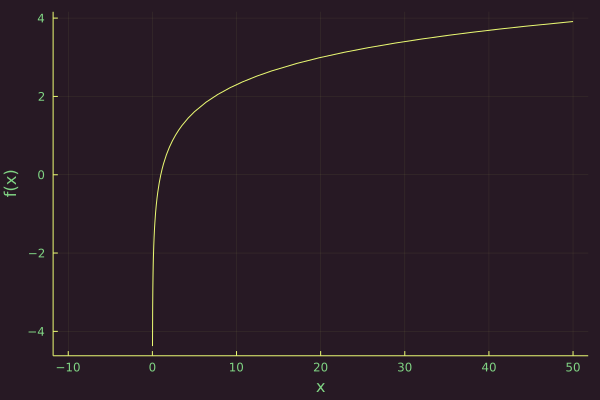

In [23]:
ln(x) = log(ℯ, x)

plot(ln, -10, 50, legend=false)
xlabel!("x")
ylabel!("f(x)")

## 3. Interpolação polinomial

Esse tópico refere-se ao problema 

> 4. Problema: Interpolação Polinomial

### 3.1 Introdução

Dado um conjunto de pontos discretos, queremos saber qual é a função que passa por todos os pontos dados de modo que no fim tenhamos algo contínuo.

Vamos testar com alguns exemplos da biblioteca.

### 3.2 Primeiro exemplo

Vamos transformar o seguinte conjunto de pontos $p = [(exp(0), 0), (exp(1), 1), (exp(2), 2)]$ em uma função contínua

O nome da função é **interpolation**, vamos explorá-la

In [24]:
?interpolation

search: interpolation interpolation_2d lagrange_interpolation



## Objetivo

Transforma um conjunto de pontos discretos em uma função contínua.

## Especificação

Para todo 1<=i<=n, F(x*i)=y*i

## Parâmetros

```
points : Vector{Tuple{Number, Number}}
    Vetor com coordenadas (x,y). Formato: ``[(x1, y1), (x2,y2)]``

method: Symbol, {:vandermonde, :lagrange}, padrão :vandermonde
    Nome do método utilizado para a interpolação.
```

## Retorno

```
function : function
    Retorna um polinômio com grau no máximo n-1 (tamanho do vetor de pontos - 1)
```

## Exceções

```
AssertionError
    Caso o método escolhido seja diferente de :vandermonde ou :lagrange
```


In [25]:
points_3_2 = [(exp(0), 0), (exp(1), 1), (exp(2), 2)]

function_3_2 = interpolation(points_3_2)


(::var"#f#37"{Int64, Vector{Float64}}) (generic function with 1 method)

In [26]:
function_3_2(3)

1.1315109615486736

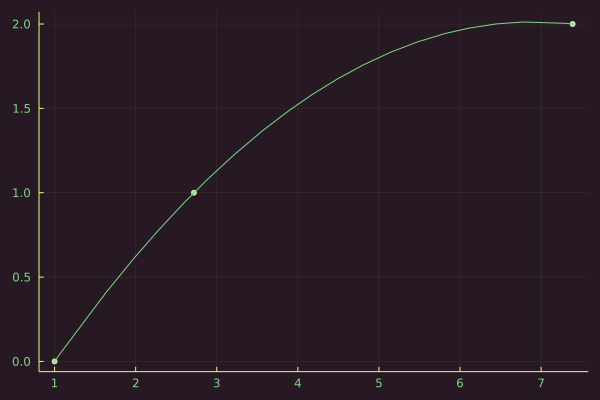

In [27]:
scatter([exp(0); exp(1); exp(2)], [0; 1; 2], c=:lightblue, ms=3, leg=false)
plot!(function_3_2)

### 3.3 Segundo exemplo

Vamos agora testar com um conjunto de pontos que é uma parábola, mas como estamos dando 4 pontos iremos observar que o grau é no máximo 3. Para isso, basta definir o segundo parâmetro da função como grau

In [28]:
points_3_3 = [(2, 20), (5, 56), (10, 156), (44, 2162), (-50, 2256)]

function_3_3 = interpolation(points_3_3)


(::var"#f#37"{Int64, Vector{Float64}}) (generic function with 1 method)

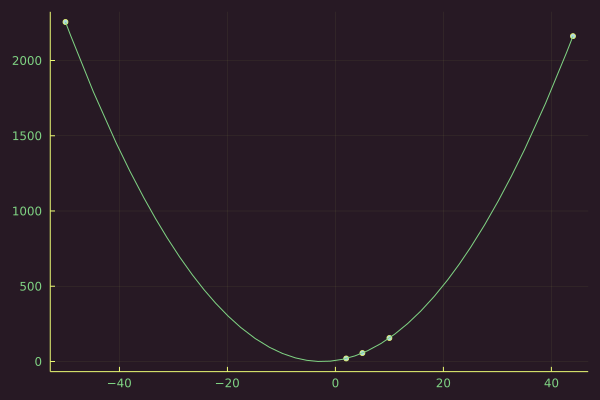

In [29]:
scatter([2; 5; 10; 44; -50], [20; 56; 156; 2162; 2256], c=:lightblue, ms=3, leg=false)
plot!(function_3_3)

### 3.4 Terceiro exemplo

Vamos agora testar com um conjunto de pontos que é o $sen$

In [30]:
points_3_4 = [(pi/2, 1), (0,0), (-pi/2, -1), (-pi, 0)]

function_3_4 = interpolation(points_3_4)


(::var"#f#37"{Int64, Vector{Float64}}) (generic function with 1 method)

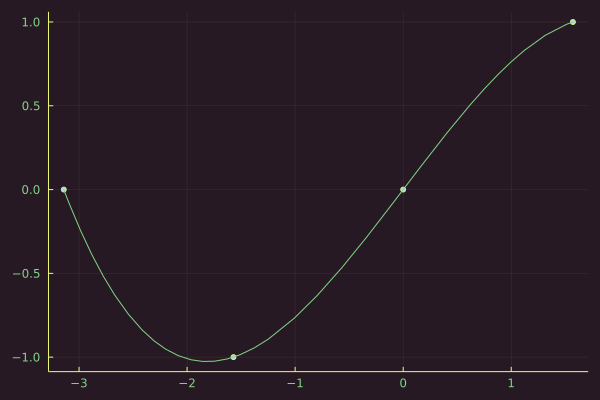

In [31]:
scatter([pi/2, 0, -pi/2, -pi], [1, 0, -1, 0], c=:lightblue, ms=3, leg=false)
plot!(function_3_4)

## 4. Regressão

Esse tópico refere-se aos problemas

> 5. Problema: Regressão Polinomial (“Interpolação aproximada”)
> 6. Problema: Regressão com coeficiente lineares (generalização do problema
anterior)

### 4.1 Introdução

Dado um conjunto de pontos discretos, queremos saber qual é a função que passa próximo de todos os pontos com o menor erro, de modo que no fim tenhamos algo contínuo.

Vamos testar com alguns exemplos da biblioteca.

### 4.2 Primeiro exemplo

Vamos transformar um conjunto de pontos totalmente aleatório, de modo que fique difícil saber exatamente qual o grau do polinômio.

O nome da função é **linear_regression**, vamos explorá-la

In [32]:
?linear_regression

search: linear_regression



## Objetivo

Realizar a regressão com coeficientes lineares

## Especificação

Para todo $1<=i<=n, F(x_i)$ aproximadamente $y_i$

## Parâmetros

```
points : Vector{Tuple{Number, Number}}
    Vetor com coordenadas (x,y). Formato: ``[(x1, y1), (x2,y2)]``

degree : Int64
    Grau da interpolação

functions: Vector{function}, default nothing
    Caso esse vetor for passado, será calculado a regressão generalizada
```

## Retorno

```
function : function
    Retorna uma função no seu formato linear tradicional ou generalizada (com multiplifcação de funções)
```


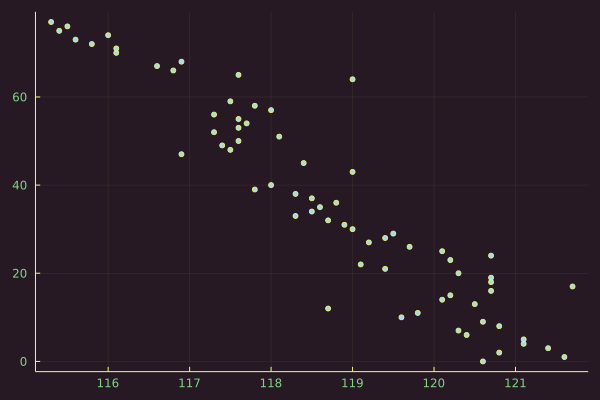

In [33]:
x = [120.6,121.6,120.8,121.4,121.1,121.1,120.4,120.3,120.8,120.6,119.6,119.8,118.7,120.5,120.1,120.2,120.7,121.7,120.7,120.7,120.3,119.4,119.1,120.2,120.7,120.1,119.7,119.2,119.4,119.5,119,118.9,118.7,118.3,118.5,118.6,118.8,118.5,118.3,117.8,118,119,118.4,116.9,117.5,117.4,117.6,118.1,117.3,117.6,117.7,117.6,117.3,118,117.8,117.5,119,117.6,116.8,116.6,116.9,116.1,116.1,115.8,115.6,116,115.4,115.5,115.3]
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,43,45,47,48,49,50,51,52,53,54,55,56,57,58,59,64,65,66,67,68,70,71,72,73,74,75,76,77]

scatter(x, y, c=:lightblue, ms=3, leg=false)

Diferentemente da interpolação, é difícil passar por todos os pontos. Para isso vamos usar a regressão. Pelo contrato da função precisamos de um conjunto de pontos no formato $[(x_0,y_0), ... ,(x_n,y_n)]$

In [34]:
points_4_2 = [(x[i], y[i]) for i in 1:length(x)]

function_4_2 = linear_regression(points_4_2, 4)


(::var"#lr#52"{Int64}) (generic function with 1 method)

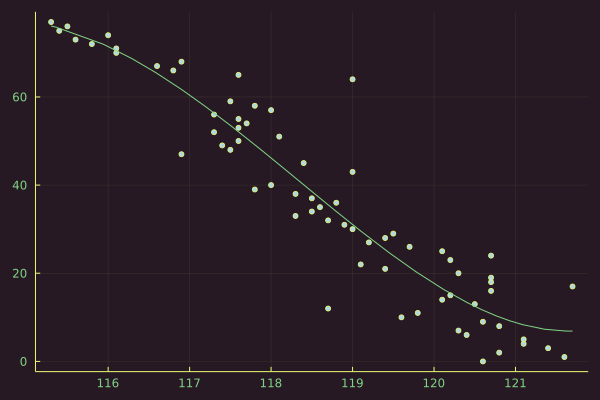

In [35]:
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(function_4_2)

### 4.3 Segundo exemplo

Vamos pegar o mesmo exemplo anterior, mas dessa vez vamos pegar os 5 primeiros pontos e tentar traçar uma reta (grau 1) passando funções de transformação

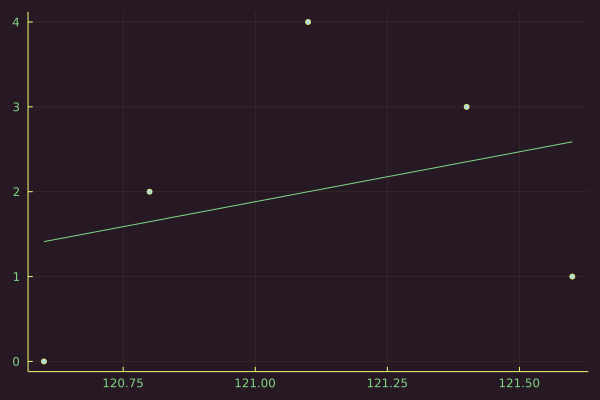

In [36]:
points_4_3 = [(x[i], y[i]) for i in 1:5]

function_4_3 = linear_regression(points_4_3, 1)

scatter(points_4_3, c=:lightblue, ms=3, leg=false)
plot!(function_4_3)


In [37]:
fv1(x) = exp(x)
fv2(x) = 2x + 1
fv3(x) = x^2 + 2x + 1

functions_4_3 = [fv1, fv2, fv3, fv1, fv2]

5-element Vector{Function}:
 fv1 (generic function with 1 method)
 fv2 (generic function with 1 method)
 fv3 (generic function with 1 method)
 fv1 (generic function with 1 method)
 fv2 (generic function with 1 method)

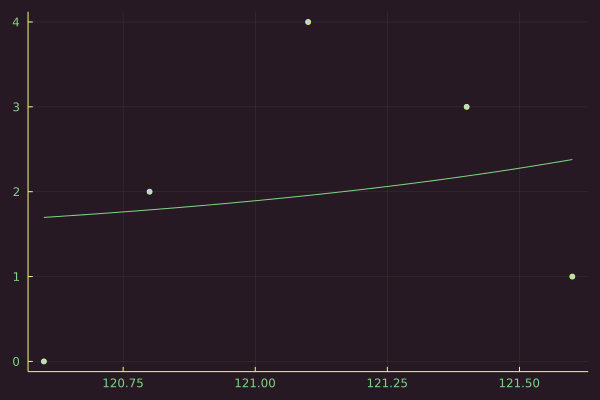

In [38]:
function_4_3 = linear_regression(points_4_3, 1, functions_4_3)

scatter(points_4_3, c=:lightblue, ms=3, leg=false)
plot!(function_4_3)

### 4.4 Terceiro exemplo

Vamos pegar o mesmo exemplo no tópico **3.3**, mas dessa vez vamos delimitar que o retorno seja uma função de grau 2, ou seja, uma parábola. Vamos adicionar somente um pequeno ruído nessa parábola

In [39]:
points_4_3 = [(2, 20), (5, 56), (10, 156), (44, 2162), (-45, 2256)]

function_4_3 = linear_regression(points_4_3, 2)

(::var"#lr#52"{Int64}) (generic function with 1 method)

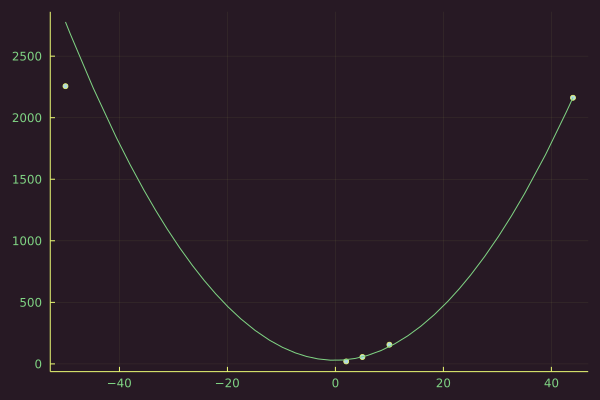

In [40]:
scatter([2; 5; 10; 44; -50], [20; 56; 156; 2162; 2256], c=:lightblue, ms=3, leg=false)
plot!(function_4_3)

## 5. Regressão com coeficientes não-lineares

Esse tópico refere-se ao problema 

> 7. Problema: Regressão com coeficientes não lineares.

### 5.1 Introdução

Dado um conjunto de pontos discretos, queremos saber qual é a função que passa próximo de todos os pontos com o menor erro, de modo que no fim tenhamos algo contínuo. O problema aqui comparado com o problema anterior é que estaremos trabalhando com coeficientes não lineares.

Para cada modelo, existe uma função correspondente seguindo o mesmo contrato, modificando apenas o modelo de abordagem, podendo ser:

**1. Exponencial**
- Modelo: $y = c_1e^{c_2x}$
- Linearização: $ln(y) = ln(c_1) + c_2x$
- Função **exponential_regression()**

**2. Potência**
- Modelo: $y = c_1x^{c_2}$
- Linearização: $ln(y) = ln(c_1) + c_2ln(x)$
- Função **potency_regression()**

**3. Geométrico**
- Modelo: $y = \frac{1}{c_1 + c_2x}$
- Linearização: $\frac{1}{y} = c_1 + c_2x$
- Função **geometric_regression()**

Todas podem ser acessadas suas respectivas documentações. Exemplo da exponencial:


In [41]:
?exponential_regression

search: exponential_regression



## Objetivo

Realizar a regressão com coeficientes não lineares para o modelo exponencial

## Especificação

Para todo $1<=i<=n, F(x_i)$ aproximadamente $y_i$ Calculada com a linearização da forma $ln(y) = ln(c1) + c2*x$

## Parâmetros

```
points : Vector{Tuple{Number, Number}}
    Vetor com coordenadas (x,y). Formato: ``[(x1, y1), (x2,y2)]``
```

## Retorno

```
function : function
    Retorna uma função com o modelo da forma ``y = c1*e^(c2*x)``
```


Veremos exemplos de cada modelo abaixo

### 5.2 Primeiro exemplo

Vamos analisar o exemplo de um conjunto de pontos que se encaixam com o modelo exponencial visualmente analisando

In [ ]:
x=[1;2;3;4;5;6;7;8;9;10]
y=[2;4;8;16;32;64;128;256;512;1024]
ruido=rand(10)*0.44
y=y+ruido

scatter(x, y, c=:lightblue, ms=3, leg=false)

Para isso, vamos fazer a regressão não linear com esses pontos e comparar com a função modelo gerada

In [ ]:
points = [(x[i],y[i]) for i in 1:length(x)]

exponencial = exponential_regression(points)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(exponencial)

### 5.3 Segundo exemplo

Vamos olhar agora para um modelo não-linear que se encaixaria no modelo de potência

In [ ]:
x = [0.1,0.2,0.4,0.8,0.9] 
y = [22,43,84,210,320] 

scatter(x, y, c=:lightblue, ms=3, leg=false)

In [ ]:
points = [(x[i],y[i]) for i in 1:length(x)]

potencia = potency_regression(points)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(potencia)

### 5.4 Terceiro exemplo

O que aconteceria se testássemos agora com alguns pontos de um modelo geométrico? 

In [ ]:
x = [2, 5, 7, 10] 
y = [1/8, 1/15, 1/18, 1/24] 

scatter(x, y, c=:lightblue, ms=3, leg=false)

In [ ]:
points = [(x[i],y[i]) for i in 1:length(x)]

geometrico = geometric_regression(points)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(geometrico)

## 6. Interpolação 2D

Esse tópico refere-se ao problema 

> 8. Problema: Interpolação 2D

### 6.1 Introdução

A ideia por trás desse problema é que dado um vetor de coordenadas (x,y) e um vetor de altura (z), queremos conseguir achar uma função de grau 2 e de duas variáveis .

Vamos testar com alguns exemplos da biblioteca com a nossa função **interpolation_2d**

In [ ]:
?interpolation_2d

### 6.2 Primeiro exemplo

In [ ]:
points = [(1,3), (4,5)]
z = [1, 4, 6, 9]

scatter(points, c=:lightblue, ms=3, leg=false)

In [ ]:
interpolation_2d_1 = interpolation_2d(points, z)

surface(x, y, interpolation_2d_1)

### 6.3 Segundo exemplo



In [ ]:
points = [(9.1,5.8), (3.9,5.99)]
z = [10, 1, 10, 2]

scatter(points, c=:lightblue, ms=3, leg=false)

In [ ]:
interpolation_2d_1 = interpolation_2d(points, z)

surface(x, y, interpolation_2d_1)

### 6.4 Terceiro exemplo



In [ ]:
points = [(90099,1), (222235,50)]
z = [1, 100, 19, 0]

scatter(points, c=:lightblue, ms=3, leg=false)

In [ ]:
interpolation_2d_1 = interpolation_2d(points, z)

surface(x, y, interpolation_2d_1)

##  7. Norma do vetor

Esse tópico refere-se ao problema 

> 9. Calcular a norma de um vetor v

### Introdução

Para calcularmos a norma de um vetor precisamos fazer a soma de todos os seus elementos ao quadrados e por fim tirar a raiz quadrada do resultado

In [ ]:
?vector_norm

### Primeiro exemplo

Vamos calcular a norma do vetor $[3,2]$

In [ ]:
v = Float64.([
    3;
    2;
]);

z = vector_norm(v)

### Segundo exemplo

In [ ]:
v = Float64.([
    6;
    7;
    10;
    1;
    2;
]);

z = vector_norm(v)

### Terceiro exemplo

In [ ]:
v = Float64.([
    10;
    10;
    10;
    10;
    10;
    10;
]);

z = vector_norm(v)

 ##  8. Mínimos quadrados

Esse tópico refere-se ao problema 

> 10. Problema: Resolver um sistema linear denso aproximadamente

### Introdução

Para aproximarmos uma resposta para o sistema linear $Ax=b$ onde $A$ é uma matriz $mxn$ e b um vetor $nx1$ podemos simplesmente resolver o sistema $A'Ax=A'b$, onde $A'$ é a transposta da matriz $A$.

In [ ]:
?least_squares

### Primeiro exemplo

In [ ]:
A = Float64.([
    44 -94 17 54 71;
    84 95 -45 98 74;
    87 91 93 15 42;
    95 64 82 16 75;
])
b = Float64.([
    125;
    658;
    965;
    225;
])

In [ ]:
x_approx = least_squares(A, b)

In [ ]:
norm(A*x_approx - b) < 1^-9  # Testo se A*x é aproximadamente b

### Segundo exemplo

In [ ]:
A = Float64.([
    51 65 72 14;
    15 32 41 65;
    12 65 54 76;
])
b = Float64.([
    125;
    658;
    75;
])


In [ ]:
x_approx = least_squares(A, b)

In [ ]:
norm(A*x_approx - b) < 1^-9  # Testo se A*x é aproximadamente b

### Terceiro exemplo

In [ ]:
A = Float64.([
    44 -94 17 54 71 65;
    84 95 -45 98 74 -40;
    87 91 93 15 42 75;
    95 64 82 16 75 63;
])
b = Float64.([
    8464;
    7854;
    3645;
    9568;
])

In [ ]:
x_approx = least_squares(A, b)

In [ ]:
norm(A*x_approx - b) < 1^-9  # Testo se A*x é aproximadamente b

 ##  9. Resolver exatamente um sistema linear 

Esse tópico refere-se ao problema 

> 11. Problema: Resolver exatamente um sistema linear denso

### Introdução

Para resolvermos o sistema linear Ax=b, utilizamos o método da decomposição LU. Primeiro fazemos a decomposição $A=LU$ e obtemos:
$$LUx=b$$

Depois fazemos a seguinte substituição $Y = Ux$ e resolvemos os seguintes sistemas:
$$LY=b$$
$$Ux=Y$$

In [ ]:
?solve_system

### Primeiro exemplo

In [ ]:
A = Float64.([
    2 -1 3;
    1 2 4;
    1 1 5;
])
b = Float64.([
    2;
    1;
    4;
])

In [ ]:
x = solve_system(A, b)

In [ ]:
norm(A*x - b) < 1^-9  # Testo se A*x é aproximadamente b

### Segundo exemplo

In [ ]:
A = Float64.([
    44 -94 17 54 71;
    84 95 -45 98 74;
    87 91 93 15 42;
    95 64 82 16 75;
    58 75 96 35 68;
])
b = Float64.([
    125;
    658;
    965;
    225;
    698;
])

In [ ]:
x = solve_system(A, b)

In [ ]:
norm(A*x - b) < 1^-9 # Testo se A*x é aproximadamente b

### Terceiro exemplo

In [ ]:
A = Float64.([
    44 -94 17 54 71 65;
    84 95 -45 98 74 -40;
    87 91 93 15 42 75;
    95 64 82 16 75 63;
    58 75 96 35 68 11;
    45 79 23 10 35 20;
])
b = Float64.([
    8464;
    7854;
    3645;
    9568;
    8972;
    9851;
])

In [ ]:
x = solve_system(A, b)

In [ ]:
norm(A*x - b) < 1^-9 # Testo se A*x é aproximadamente b

 ## 10. Resolver um sistema triangular superior

Esse tópico refere-se ao problema 

> 12. Problema: Resolver um sistema triangular superior

### Introdução

Para resolver um sistema $Ax=y$ sendo $A$ uma matriz triangular superior basta começarmos a resolver de baixo para cima e ir substituindo os valores nas equações de cima. 

In [ ]:
?upper_triangular_solve

### Primeiro exemplo

In [ ]:
A = Float64.([
    2 -1 3;
    0 2 4;
    0 0 5;
])
y = Float64.([
    2;
    1;
    4;
])

In [ ]:
x = upper_triangular_solve(A, y)

In [ ]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

### Segundo exemplo

In [ ]:
A = Float64.([
    44 -94 17 54 71;
    0 95 -45 98 74;
    0 0 93 15 42;
    0 0 0 16 75;
    0 0 0 0 68;
])
y = Float64.([
    125;
    658;
    965;
    225;
    698;
])

In [ ]:
x = upper_triangular_solve(A, y)

In [ ]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

### Terceiro exemplo

In [ ]:
A = Float64.([
    44 -94 17 54 71 65;
    0 95 -45 98 74 -40;
    0 0 93 15 42 75;
    0 0 0 16 75 63;
    0 0 0 0 68 11;
    0 0 0 0 0 20;
])
y = Float64.([
    8464;
    7854;
    3645;
    9568;
    8972;
    9851;
])

In [ ]:
x = upper_triangular_solve(A, y)

In [ ]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

 ## 11. Resolver um sistema triangular inferior

Esse tópico refere-se ao problema 

> 13. Problema: Resolver um sistema triangular inferior

### Introdução

Para resolver um sistema $Ax=y$ sendo $A$ uma matriz triangular inferior basta começarmos a resolver de cima para baixo e ir substituindo os valores nas equações de baixo. 

In [ ]:
?lower_triangular_solve

### Primeiro exemplo

In [ ]:
A = Float64.([
    2 0 0;
    1 2 0;
    1 1 5;
])
y = Float64.([
    2;
    1;
    4;
])

In [ ]:
x = lower_triangular_solve(A, y)

In [ ]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

### Segundo exemplo

In [ ]:
A = Float64.([
    44 0 0 0 0;
    84 95 0 0 0;
    87 91 93 0 0;
    95 64 82 16 0;
    58 75 96 35 68;
])
y = Float64.([
    125;
    658;
    965;
    225;
    698;
])

In [ ]:
x = lower_triangular_solve(A, y)

In [ ]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

### Terceiro exemplo

In [ ]:
A = Float64.([
    44 0 0 0 0 0;
    84 95 0 0 0 0;
    87 91 93 0 0 0;
    95 64 82 16 0 0;
    58 75 96 35 68 0;
    45 79 23 10 35 20;
])
y = Float64.([
    8464;
    7854;
    3645;
    9568;
    8972;
    9851;
])

In [ ]:
x = lower_triangular_solve(A, y)

In [ ]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

 ##  12. Resolver um sistema diagonal

Esse tópico refere-se ao problema 

> 14.Problema: Resolver um sistema diagonal

### Introdução

Para resolver um sistema $Ax=y$ onde $A$ é uma matriz diagonal basta dividirmos o lado direito pelo coeficiente de cada variável

In [ ]:
?solve_diagonal

### Primeiro exemplo

In [ ]:
A = Float64.([
    2 0 0;
    0 2 0;
    0 0 5;
])
y = Float64.([
    2;
    1;
    4;
])

In [ ]:
x = solve_diagonal(A, y)

In [ ]:
 norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

### Segundo exemplo

In [ ]:
A = Float64.([
    44 0 0 0 0;
    0 95 0 0 0;
    0 0 93 0 0;
    0 0 0 16 0;
    0 0 0 0 68;
])
y = Float64.([
    125;
    658;
    965;
    225;
    698;
])

In [ ]:
x = solve_diagonal(A, y)

In [ ]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

### Terceiro exemplo

In [ ]:
A = Float64.([
    44 0 0 0 0 0;
    0 95 0 0 0 0;
    0 0 93 0 0 0;
    0 0 0 16 0 0;
    0 0 0 0 68 0;
    0 0 0 0 0 20;
])
y = Float64.([
    8464;
    7854;
    3645;
    9568;
    8972;
    9851;
])

In [ ]:
x = solve_diagonal(A, y)

In [ ]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

 ## 13. Achar a inversa de uma matriz

Esse tópico refere-se ao problema 

> 15. Problema: achar a inversa de uma matriz

### Introdução

Para acharmos a inversa de uma matriz $A$ no formato $nxn$ utilizamos a decomposição LU. Após fazermos a decomposição $A=LU$, nós podemos resolver os $n$ sistemas:
$$LUx_i=b_i$$
Onde $b_i$ é a i-ésima coluna da matriz identidade e $x_i$ é a i-ésima coluna da inversa de A.

In [ ]:
?inverse_LU

### Primeiro exemplo

In [ ]:
A = Float64.([
    2 -1 3;
    1 2 4;
    1 1 5;
])

In [ ]:
A_inv = inverse_LU(A)

In [ ]:
n, = size(A)
identidade = Matrix(1.0I, n, n)

In [ ]:
norm(A * A_inv - identidade) < 1e-9 # Testo se A vezes a inversa de A é aproxidamente a identidade

### Segundo exemplo

In [ ]:
A = Float64.([
    44 -94 17 54 71;
    84 95 -45 98 74;
    87 91 93 15 42;
    95 64 82 16 75;
    58 75 96 35 68;
])

In [ ]:
A_inv = inverse_LU(A)

In [ ]:
n, = size(A)
identidade = Matrix(1.0I, n, n)

In [ ]:
norm(A * A_inv - identidade) < 1e-9 # Testo se A vezes a inversa de A é aproxidamente a identidade

### Terceiro exemplo

In [ ]:
A = Float64.([
    44 -94 17 54 71 65;
    84 95 -45 98 74 -40;
    87 91 93 15 42 75;
    95 64 82 16 75 63;
    58 75 96 35 68 11;
    45 79 23 10 35 20;
])

In [ ]:
A_inv = inverse_LU(A)

In [ ]:
n, = size(A)
identidade = Matrix(1.0I, n, n)

In [ ]:
norm(A * A_inv - identidade) < 1e-9 # Testo se A vezes a inversa de A é aproxidamente a identidade

## 14. Decomposição LU

Esse tópico refere-se ao problema 

> 16. Problema: Decomposição LU

Dada uma matriz quadrada $A$ de tamanho $(n,n)$, é possível realizar sua decomposição LU. A decomposição consiste em uma matriz $L$ triangular inferior e uma matriz $U$ triangular superior tal que $A=LU$. O método _lu\_decomposition(matrix)_ recebe uma matriz $A$ e retorna as matrizes $L$ e $U$ de sua decomposição.

### Exemplo 14.1
Matriz diagonal

In [4]:
A_14_1 = [
    1 0 0;
    0 2 0;
    0 0 4;
]

L_14_1, U_14_1 = lu_decomposition(A_14_1)
display(L_14_1)
display(U_14_1)
display(L_14_1*U_14_1)
@assert(norm(L_14_1*U_14_1 - A_14_1) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

### Exemplo 14.2
Matriz tiangular inferior

In [5]:
A_14_2 = [
    1 0 0;
    5 2 0;
    8 1 4;
]

L_14_2, U_14_2 = lu_decomposition(A_14_2)
display(L_14_2)
display(U_14_2)
display(L_14_2*U_14_2)
@assert(norm(L_14_2*U_14_2 - A_14_2) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 5.0  1.0  0.0
 8.0  0.5  1.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 5.0  2.0  0.0
 8.0  1.0  4.0

### Exemplo 14.3
Matriz triangular superior

In [6]:
A_14_3 = [
    1 7 2;
    0 2 9;
    0 0 4;
]

L_14_3, U_14_3 = lu_decomposition(A_14_3)
display(L_14_3)
display(U_14_3)
display(L_14_3*U_14_3)
@assert(norm(L_14_3*U_14_3 - A_14_3) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Matrix{Float64}:
 1.0  7.0  2.0
 0.0  2.0  9.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  7.0  2.0
 0.0  2.0  9.0
 0.0  0.0  4.0

### Exemplo 14.4
Matriz densa

In [7]:
A_14_4 = [
    1 2 3;
    5 2 9;
    8 1 4;
]

L_14_4, U_14_4 = lu_decomposition(A_14_4)
display(L_14_4)
display(U_14_4)
display(L_14_4*U_14_4)
@assert(norm(L_14_4*U_14_4 - A_14_4) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0    0.0
 5.0  1.0    0.0
 8.0  1.875  1.0

3×3 Matrix{Float64}:
 1.0   2.0   3.0
 0.0  -8.0  -6.0
 0.0   0.0  -8.75

3×3 Matrix{Float64}:
 1.0  2.0  3.0
 5.0  2.0  9.0
 8.0  1.0  4.0

## 15. PVC

O Problema de Valor no Contorno é uma equação diferencial na qual se recebe dois pontos da função a ser encontrada e é dada sua segunda derivada. O método implementado resolve equações que possuam o seguinte formato:
* $y''(x) = c_1 + c_2y(x) + c_3y'(x)$
* $y(x_i) = y_i$
* $y(x_f) = y_f$

O método então retorna os valores da função y dentro do intervalo

### Exemplo 15.1
Função polinomial de segundo grau

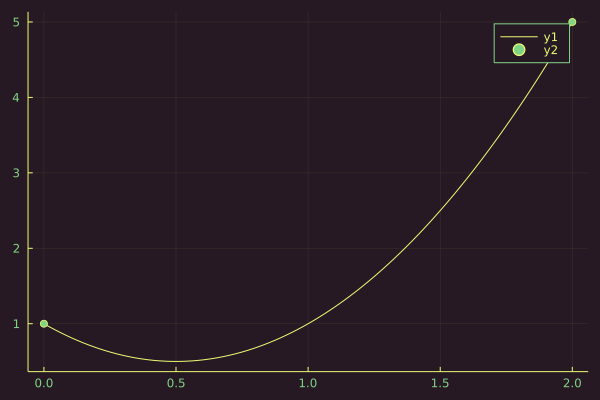

In [37]:
coeff_15_1 = [2, 0, 0]
xi_15_1 = 0
xf_15_1 = 2
yi_15_1 = 1
yf_15_1 = 5
n_15_1 = 1024
y_15_1 = generic_bvp(coeff_15_1, xi_15_1, xf_15_1, yi_15_1, yf_15_1, n_15_1)


x_15_1 = xi_15_1:(xf_15_1-xi_15_1)/(n_15_1-1):xf_15_1
plot(x_15_1, y_15_1)
scatter!([xi_15_1,xf_15_1],[yi_15_1,yf_15_1])

### Exemplo 15.2
Função exponencial

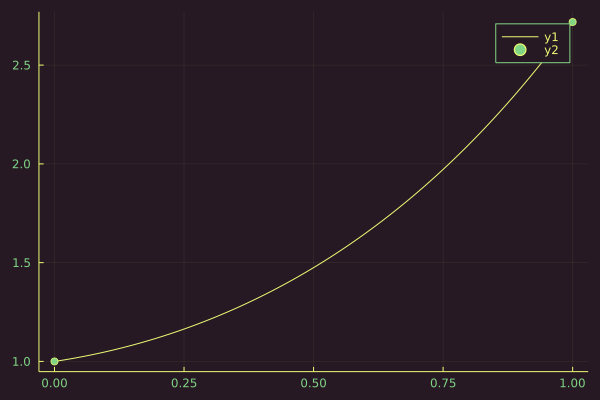

In [38]:
coeff_15_2 = [0, 0, 1]
xi_15_2 = 0
xf_15_2 = 1
yi_15_2 = 1
yf_15_2 = exp(1)
n_15_2 = 1024
y_15_2 = generic_bvp(coeff_15_2, xi_15_2, xf_15_2, yi_15_2, yf_15_2, n_15_2)


x_15_2 = xi_15_2:(xf_15_2-xi_15_2)/(n_15_2-1):xf_15_2
plot(x_15_2, y_15_2)
scatter!([xi_15_2,xf_15_2],[yi_15_2,yf_15_2])

### Exemplo 15.3
Função exponencial

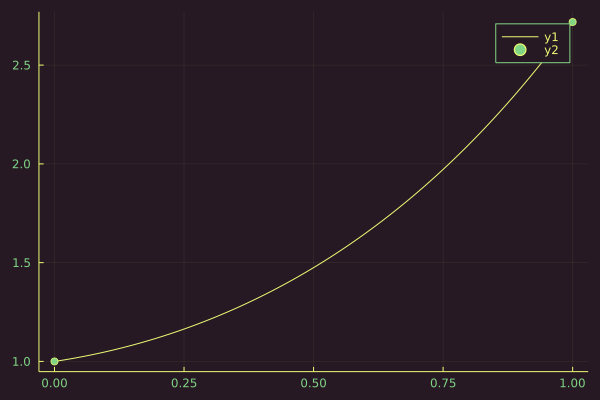

In [39]:
coeff_15_3 = [0, 1, 0]
xi_15_3 = 0
xf_15_3 = 1
yi_15_3 = 1
yf_15_3 = exp(1)
n_15_3 = 1024
y_15_3 = generic_bvp(coeff_15_3, xi_15_3, xf_15_3, yi_15_3, yf_15_3, n_15_3)


x_15_3 = xi_15_3:(xf_15_3-xi_15_3)/(n_15_3-1):xf_15_3
plot(x_15_3, y_15_3)
scatter!([xi_15_3,xf_15_3],[yi_15_3,yf_15_3])

### Exemplo 15.4
Função aleatória

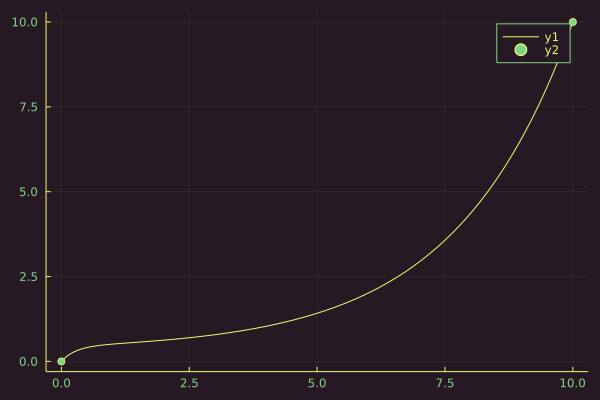

In [41]:
coeff_15_4 = randn(3)
xi_15_4 = 0
xf_15_4 = 10
yi_15_4 = 0
yf_15_4 = 10
n_15_4 = 1024
y_15_4 = generic_bvp(coeff_15_4, xi_15_4, xf_15_4, yi_15_4, yf_15_4, n_15_4)


x_15_4 = xi_15_4:(xf_15_4-xi_15_4)/(n_15_4-1):xf_15_4
plot(x_15_4, y_15_4)
scatter!([xi_15_4,xf_15_4],[yi_15_4,yf_15_4])

## ?. Derivada Contínua

Esse tópico refere-se ao problema 

> 21. Derivada Numérica com uma função contínua

### Introdução

Nesse bloco vamos calcular uma derivada de uma função contínua em um determinado ponto.
A ideia por trás é receber um parâmetro h, onde quando h tende a 0 temos a aproximação da derivada nesse ponto.

Para isso vamos utilizar a função **continuous_derivative**, vamos explorá-la

In [73]:
?continuous_derivative

search: continuous_derivative



## Objetivo

Realiza a derivada de uma função contínua em um ponto

## Especificação

$dx \approx f'(x)$

## Parâmetros

```
f : Function
    Função a ser derivada
    
x : Number
    Ponto da derivação

h : Number
    Tamanho do intervalo

option : Symbol, {:front, :back, :center}, padrão :center
    Estratégia de derivação
```

## Retorno

```
dx : Float64
    Derivada no ponto x
```


### Primeiro exemplo

Vamos iniciar com uma função que sabemos derivar facilmente

$$
f(x) = x^2
$$

$$
f'(x) = 2x
$$

$$
f'(1) = 2
$$

Portanto, o resultado esperado de nossa função é ser aproximadamente 2. Vamos calcular utilizando o método de diferença para frente. Vamos usar o parâmetro ":front"

In [82]:
f(x) = x^2
continuous_derivative(f, 1, 1e-3, :front)

2.0009999999996975

### Segundo exemplo

$$
f(x) = sen(x)
$$

$$
f'(x) = cos(x)
$$

$$
f'(\pi) = cos(\pi) = -1
$$

Portanto, o resultado esperado de nossa função é ser aproximadamente -1. Vamos calcular utilizando o método de diferença para trás. Vamos usar o parâmetro ":back"

In [88]:
f(x) = sin(x)
continuous_derivative(f, pi, 1e-3, :back)

-0.9999998333332315

### Terceiro exemplo

$$
f(x) = ln(x)
$$

$$
f'(x) = 1/x
$$

$$
f'(2) = 1/2
$$

Portanto, o resultado esperado de nossa função é ser aproximadamente 1/2. Vamos calcular utilizando o método de diferenças centradas. Vamos usar o parâmetro ":center"

In [90]:
ln(x) = log(ℯ, x) 
f(x) = ln(x)
continuous_derivative(f, 2, 1e-3, :back)

0.5001250416821756

## ?. Derivada Discreta

Esse tópico refere-se ao problema 

> 22. Derivada Numérica com uma função discreta

### Introdução

Nesse bloco vamos calcular uma derivada de uma função discreta dado um determinado intervalo.

Para isso vamos utilizar a função **discrete_derivative**, vamos explorá-la

In [6]:
?discrete_derivative

search: discrete_derivative



## Objetivo

Realiza a derivada de uma função discreta em um intervalo

## Especificação

$fy(x_i) \approx y'(x_i)$

## Parâmetros

```
f : Vector
    Vetor dos valores da funçãoa
    
x : Vector
    Vetor dos valores do domínio da função

degree : Int64
    Grau da derivação

option : Symbol, {:front, :back, :center}, padrão :center
    Estratégia de derivação
```

## Retorno

```
fy : Vector{Float64}
    Vetor das derivadas em cada ponto do domínio
```


### Primeiro exemplo

Vamos calcular uma derivada de primeiro grau de derivação da função $f(x) = x^2$ aproximada

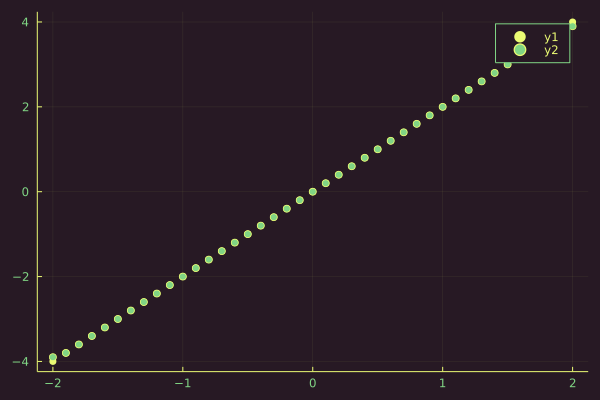

In [3]:
x = [k for k = -2:0.1:2] # Vetor contendo os valores dos pontos em x
y = [k^2 for k in x]# Vetor contendo os valores dos pontos em y, que são x^2
dy = [2*k for k in x] # Primeira derivada da função x^2
res = discrete_derivative(y, x, 1) # Faço a derivada discreta e recebo os pontos

scatter(x, dy) # Plot da primeira derivada
scatter!(x, res) # Plot da derivada discreta

### Segundo exemplo

Vamos calcular uma derivada de segundo grau de derivação da função $f(x) = x^5$ aproximada

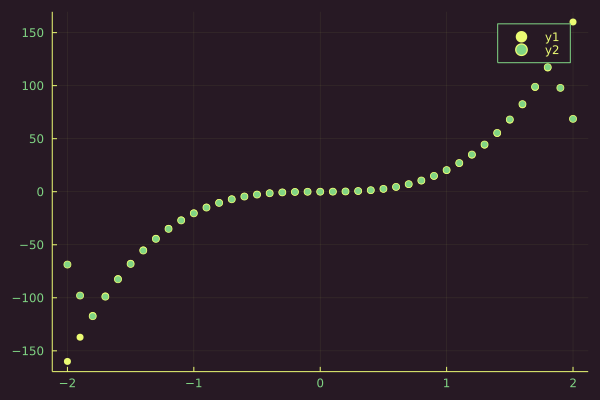

In [4]:
x = [k for k = -2:0.1:2] # Vetor contendo os valores dos pontos em x
y = [k^5 for k in x]# Vetor contendo os valores dos pontos em y, que são x^5
ddy = [20*k^3 for k in x] # Segunda derivada da função x^5
res = discrete_derivative(y, x, 2) # Faço a derivada discreta e recebo os pontos
scatter(x, ddy) # Plot da segunda derivada
scatter!(x, res) # Plot da derivada discreta

### Terceiro exemplo

Vamos calcular uma derivada de primeiro grau de derivação da função $f(x) = 3x^2+6x+7$ aproximada

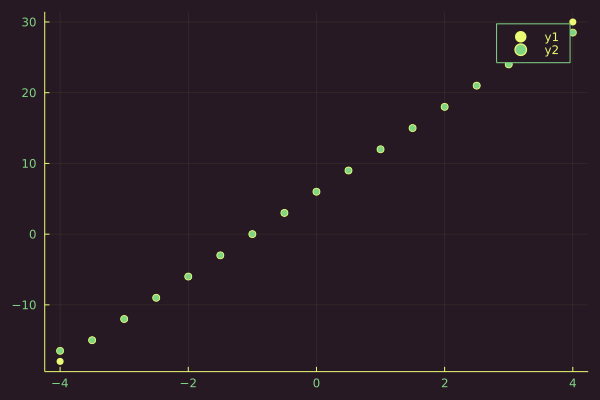

In [8]:
x = [k for k = -4:0.5:4] # Vetor contendo os valores dos pontos em x
y = [3*k^2+6*k+7 for k in x]# Vetor contendo os valores dos pontos em y, que são 3*k^2+6*k+7
dy = [6*k+6 for k in x] # Primeira derivada da função 3*k^2+6*k+7

res = discrete_derivative(y, x, 1) # Faço a derivada discreta e recebo os pontos
scatter(x, dy) # Plot da primeria derivada
scatter!(x, res) # Plot da derivada discreta

## ?. Integral Numérica

Esse tópico refere-se aos problemas

> 18. Problema: Integração Numérica (com o número de intervalos)
> 19. Problema: Integração Numérica (com o erro)
> 20. Bônus: Problema: Integração Dupla

### Introdução

Nesse bloco vamos calcular a integral.

Para isso vamos utilizar a função **numerical_integration**, vamos explorá-la

In [3]:
?numerical_integration

search: numerical_integration



## Objetivo

Realiza a integral numérica com um determinado número de intervalos

## Especificação

$S \approx \int_a^b f(x)dx$

## Parâmetros

```
f : Function
    Função a ser derivada
    
a : Number
    Limite inferior da integral

b : Number
    Limite superior da integral

n : Number
    Número de intervalos
```

## Retorno

```
S : Float64
    Aproximação da integral
```

---

## Objetivo

Realiza a integral numérica com erro máximo

## Especificação

$\left| S - \int_a^b f(x)dx \right| < \text{erro}$

## Parâmetros

```
f : Function
    Função a ser derivada
    
a : Number
    Limite inferior da integral

b : Number
    Limite superior da integral

error : Number
    Erro máximo

M : Number
    Limite superior para a segunda derivada
```

## Retorno

```
S : Float64
    Aproximação da integral
```

---

## Objetivo

Realiza a integral dupla numérica com um determinado número de intervalos

## Especificação

$S \approx \int_a^b \int_{h(x)}^{g(x)} f(x,y) dx dy$

## Parâmetros

```
f : Function
    Função a ser derivada
    
a : Number
    Limite inferior da integral

b : Number
    Limite superior da integral

n : Number
    Número de intervalos
```

## Retorno

```
S : Float64
    Aproximação da integral
```


### Primeiro exemplo


In [8]:
f(x) = x^2
a = 0
b = 2
error = 1e-7
M = 2
@assert(abs(numerical_integration(f, a, b, error, M) - 8/3) < error)
numerical_integration(f, a, b, error, M)

LoadError: MethodError: no method matching numerical_integration(::typeof(f), ::Int64, ::Int64, ::Float64)
[0mClosest candidates are:
[0m  numerical_integration(::Function, ::Number, ::Number, ::Number, [91m::Number[39m) at C:\Users\gabrielly.andrade\Documents\DCC\numerical-calculus-library\NumericalCalculus.jl:1123
[0m  numerical_integration(::Function, ::Number, ::Number) at C:\Users\gabrielly.andrade\Documents\DCC\numerical-calculus-library\NumericalCalculus.jl:1072
[0m  numerical_integration(::Function, ::Number, ::Number, [91m::Int64[39m) at C:\Users\gabrielly.andrade\Documents\DCC\numerical-calculus-library\NumericalCalculus.jl:1072
[0m  ...

### Segundo exemplo



In [5]:
# Area do circulo
f(x,y) = y
h(x) = 0
g(x) = 2π
a = 0
b = 1
n = 1024
numerical_integration(f, g, h, a, b, n)

3.1415926535897962

### Terceiro exemplo


In [6]:
# Integral nao calculavel por metodos tradicionais
f(x,y) = ℯ^(x^2)
h(y) = y^2
g(y) = y
a = 0
b = 1
n = 1024
numerical_integration(f, g, h, a, b, n)

0.21159889998140757

## ?. Resolver PVC

In [ ]:
generic_bvp

In [ ]:
generic_bvp_matrix(5, 1, 2, 3)